In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#Función que recibe dos matrices y una mascara 
# Devuelve un par de arreglos co
def conditions(A,B,cn):

    y = A.copy()
    #Evalua el complemnto de la condicion y los elementos que cumplan los vuelve cero
    y[ cn == False] = 0
    #Define una mascara
    m = y!=0
    #Se crea una copia del array evaluando la mascara y devolviendo un arreglo sin los elmentos cero
    x=B[m]
    y=y[m]
    
    return x,y

Metodo 2 Grafica la za vs el det y clasificarlos segun la curva

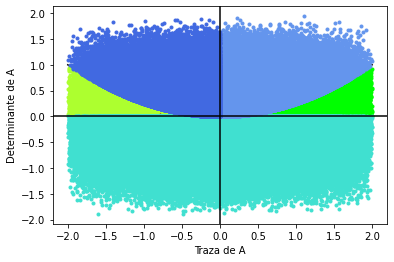

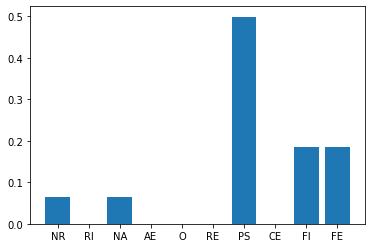

In [ ]:
def clasification(n,pre):

    tr = [np.trace(np.random.uniform(-1,1,(2,2))) for i in range(n)]
    det = [np.linalg.det(np.random.uniform(-1,1,(2,2))) for i in range(n)]

    trA = np.array(tr)
    detA = np.array(det)
    
    Del = np.power(trA,2) - 4*detA

    xpar = np.linspace(-2,2,100)
    par = np.power(xpar,2)/4
      
    

    ###D>0
    c1=(detA > pre) 


    ## Tr > 0:
    c2 = (trA > pre )
    #Delta > 0:Nodo repulsor e inestabilidad
    c3 = (Del> pre)
    x1,y1 = conditions(detA,trA,(c1 & c2 & c3))
    #Delta = 0:Repulsor e inestabilidad
    c3 = (Del>=-pre) & (Del<=pre)
    x2,y2 = conditions(detA,trA,(c1 & c2 & c3))
    
    ## Tr < 0: 
    c2 = (trA < -pre)
    #Delta > 0:Nodo atractor y estabilidad asintótica
    c3 = (Del> pre)
    x3,y3 = conditions(detA,trA,(c1 & c2 & c3))
    #Delta = 0:Atractor y estabilidad asintótica
    c3 = (Del>=-pre) & (Del<=pre)
    x4,y4 = conditions(detA,trA,(c1 & c2 & c3))





    ### Det = 0:
    c1 = (detA>=-pre) & (detA<=pre) 

    # Tr = 0: Origen
    c2 = (trA>=-pre) & (trA<=pre) 
    x5,y5 = conditions(detA,trA,(c1 & c2 ))
    # Tr > 0: Recta de puntos de equilibrio inestables y trayectorias 
    #rectas que se alejan de la recta de puntos de equilibrio
    c2 = (pre< trA )
    x6,y6 = conditions(detA,trA,(c1 & c2 ))
    # Tr < 0: Recta de puntos de equilibrio asintóticamente estables y 
    #trayectorias rectas que tienden a la recta de puntos de equilibrio
    c2 = (trA < -pre)
    x7,y7 = conditions(detA,trA,(c1 & c2 ))



    ###Det<0:Puntos de siilla e inestabilidad
    c1=( detA < -pre )
    x8,y8 = conditions(detA,trA,(c1))


    



    ##Delta < 0:
    c1 = (Del < -pre)

    # Tr = 0: Centro y estabilidad
    c2 = (trA>=-pre) & (trA<=pre) 
    x9,y9 = conditions(detA,trA,(c1 & c2 ))
    # Tr > 0: Foco e instabilidadasintótica
    c2 = (trA > pre )
    x10,y10 = conditions(detA,trA,(c1 & c2 ))
    # Tr < 0: Foco y estabilidad asintótica
    c2 = (trA < -pre)
    x11,y11 = conditions(detA,trA,(c1 & c2 ))
    




    plt.plot(xpar,par,"k-")#Grafica de la parabola



    plt.plot(x1,y1,".",color="lime") #Nodo repulsor e inestabilidad
    plt.plot(x2,y2,"*",color="brown") #Repulsor e inestabilidad
    plt.plot(x3,y3,".",color="greenyellow") #Nodo atractor y estabilidad asintótica
    plt.plot(x4,y4,"*",color="firebrick") #Atractor y estabilidad asintótica

    
    plt.plot(x5,y5,"o",color="white") #Origen
    plt.plot(x6,y6,"*",color="salmon") #Recta de puntos de equilibrio inestables y trayectorias 
    #rectas que se alejan de la recta de puntos de equilibrio
    plt.plot(x7,y7,"*",color="sienna") #Recta de puntos de equilibrio asintóticamente estables y 
    #trayectorias rectas que tienden a la recta de puntos de equilibrio

    plt.plot(x8,y8,".",color="turquoise") #Puntos de siilla e inestabilidad

    plt.plot(x9,y9,"*",color="indigo") #Centro y estabilidad
    plt.plot(x10,y10,".",color="cornflowerblue") #Foco e inestabilidad 
    plt.plot(x11,y11,".",color="royalblue") #Foco y estabilidad asintótica



    plt.xlabel("Traza de A")
    plt.ylabel("Determinante de A")

    plt.axhline(y=0, xmin=-2, xmax=1 ,color="k") #Linea Horizontal
    plt.axvline(x=0, ymin=0, ymax=1,color="k") #Linea vertical

    plt.savefig('Diagrama.pdf')
    plt.show()

    ys = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11]
    nms = ['NR', 'RI', 'NA', 'AE','O', 'RI','RE', 'PS','CE','FI','FE']
    yps = [len(i)/n for i in ys]

    plt.bar(nms, yps)

    plt.savefig('Histograma.pdf')
    plt.show()


# pre = 0.07
# n = 50000

pre = 1e-6
n = 1000000
clasification(n,pre)  

In [ ]:
# function to return the derivatives
def derivatives(y,lim,n): return np.random.uniform(-lim,lim,(n,n))*y


In [ ]:
N = 10 # Number of initial conditions
LIM =100.0; 
YMIN = -100.0; YMAX = 100.0 # velocity

X, Y = np.meshgrid(np.linspace(-LIM, LIM, N), np.linspace(-LIM, LIM, N))

DX,DY = derivatives((X, Y), 1,N)
print(DX,DY)

[[-55.17790165  77.10307334  29.09045639 -24.42416625  -3.63544308
   -7.77671175 -13.60715517 -50.23808305  30.27111352  93.20371354]
 [ 26.85234416  -0.50899615 -22.00685815  27.6308212    1.40731856
   -8.87317949 -19.91727298 -43.02140095  -6.33688895  13.68747512]
 [ 25.07771743  22.00049314  18.34318479 -30.34583186  -9.86542131
   -6.27929729  30.37176936  31.04246513  23.50249447  78.40640681]
 [ 97.2689521   50.32273008  43.88196219 -28.67955039   5.35384152
   -4.21278903  -0.28847476  29.92763039  10.0769926  -36.15558992]
 [ 40.1333997  -73.79556297  42.73162456  22.27550449   8.29879406
    4.70404506   9.91057146  50.23538049 -48.49498655  82.42520867]
 [-87.05308202 -39.99946569 -22.809773    29.31099813   6.53018448
   -9.81964366 -23.91352291  19.64784449 -18.15937645  80.19991721]
 [ 89.86858006  23.07468846  -2.62054896   2.31352325   9.66965601
    9.70553894  29.84653465   0.71247849  10.36995926 -13.14786584]
 [ 25.9410469  -15.01715661  23.13938364   9.03538775  

In [ ]:
%matplotlib inline
def graph():
    sns.set()
    sns.set_context('poster')

    N = 10 # Number of initial conditions
    LIM =100.0; 

    X, Y = np.meshgrid(np.linspace(-LIM, LIM, N), np.linspace(-LIM, LIM, N))

    DX,DY = derivatives((X, Y), 1,N)

    M = 1
    E = M*9.81*X + 0.5*M*Y*Y

    fig = plt.figure(figsize=(10,10))
    plt.streamplot(X, Y, DX, DY, density=[3, 3], color=E, arrowsize=2, arrowstyle='fancy', linewidth=2, cmap='plasma')
    plt.colorbar()

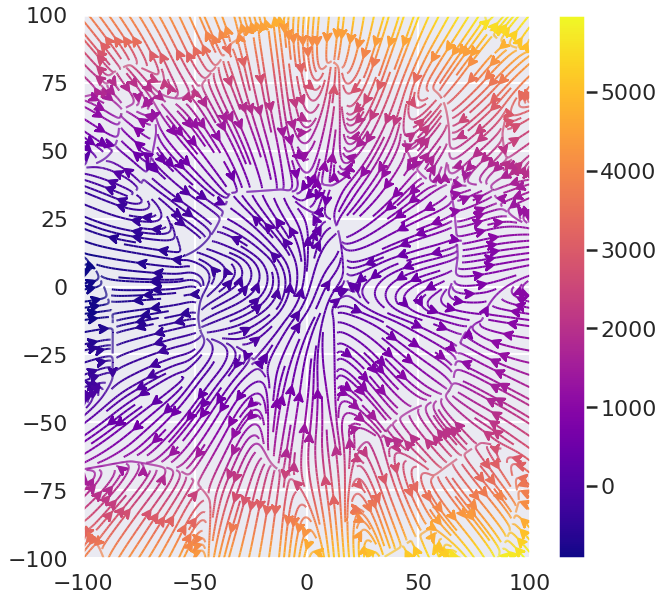

In [ ]:
graph()